# Dictionaries, Maps, and Skip Lists



In Python, dictionaries (or dicts for short) are a central data structure. Dicts store an arbitrary number of objects, each identified by a unique dictionary key.

Dictionaries are also often called maps, hashmaps, lookup tables, or associative arrays. They allow for the efficient lookup, insertion, and deletion of any object associated with a given key.

Phone books make a decent real-world analog for dictionary objects. They allow you to quickly retrieve the information (phone number) associated with a given key (a person’s name). Instead of having to read a phone book front to back to find someone’s number, you can jump more or less directly to a name and look up the associated information.

This analogy breaks down somewhat when it comes to how the information is organized to allow for fast lookups. But the fundamental performance characteristics hold. Dictionaries allow you to quickly find the information associated with a given key.

Dictionaries are one of the most important and frequently used data structures in computer science. So, how does Python handle dictionaries? Let’s take a tour of the dictionary implementations available in core Python and the Python standard library.

# dict: Your Go-To Dictionary

Because dictionaries are so important, Python features a robust dictionary implementation that’s built directly into the core language: the dict data type.

Python also provides some useful syntactic sugar for working with dictionaries in your programs. For example, the curly-brace ({ }) dictionary expression syntax and dictionary comprehensions allow you to conveniently define new dictionary objects:

In [ ]:
phonebook = {
    "bob": 7387,
     "alice": 3719,
     "jack": 7052,
 }

squares = {x: x * x for x in range(6)}

print(phonebook["alice"])


print(squares)

3719
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}


#The Map Abstract Data Type

* The map is an abstract data type that contains a collection of records. 
* Every record of a map contains a key and a value. 
* The property of the map is such that every value can be accessed or retrieved with the help of a key. 
* Python's built-in dictionary is an example of this.


## Map Core Functionality

* M[k]: Return the value associated with the key ```k```
* M[k]=v: Assign the value of the key ```k``` to ```v```
* del M[k]: remove the item with the key equal to k. Raise a KeyError if this does not exist
* len(M): As we have seen in previous data structures, we use ```__len__``` to implement this special method
* iter(M): As we have seen in previous data structures, we use ```__iter__``` to allow iterating over the sequence

## Mapping in Python

The [collections](https://docs.python.org/3/library/collections.abc.html) module provides two Map abstract base classes: the Mapping and MutableMapping classes. 
* The **Mapping** class includes all nonmutating methods supported by Python’s dict class. 
* The **MutableMapping** class extends that to include the mutating methods. 
* These Map classes provide the framework for you to implement a map class, including all the functionality discussed above.


### Mutable Mapping contains the following abstract methods:

* ```__getitem__```
* ```__setitem__```
* ```__delitem__```
* ```__iter__```
* ```__len__```

So as long as we implement these methods, we can inherit all other derived behaviours.

## Map Base Class

As there are multiple implementations for a map, let's start with a MapBase class that inherits MutableMapping and implements a composite to store the key and the value. We are using a [composite](https://refactoring.guru/design-patterns/composite/python/example#:~:text=Composite%20is%20a%20structural%20design,require%20building%20a%20tree%20structure.) because that's what is used in the book, but you can think of another way to store this data.

In [ ]:
from collections.abc import MutableMapping

class MapBase(MutableMapping):
  
  #Inner Class: Item, to store the key and the value
  class _Item:
    #store the key-value pairs as a composite
    __slots__ = '_key', '_value'

    def __init__(self, k, v):
      self._key = k
      self._value = v

    def __eq__(self, other):
      return self._key == other._key

    def __ne__(self, other):
      return not (self == other)

    def __lt__(self,other):
      return self._key< other._key


  

## Our First Map Implementation: The Unsorted Map

* We will store key-value pairs in an arbitrary order in the map
* We create an empty table within the constructor
* When a new key is entered into the map, we create a new instance of the ```_Item``` class (inherited from MapBase)
* ```___getItem__```, ```__setitem__```, and ```__delitem__``` rely on for loops to search for a matching key. While not the most efficient, it is a simple implementation for now. 


In [ ]:
class UnsortedTableMap(MapBase):
    def __init__(self):
        self._table = []

    def __len__(self):
        return len(self._table)

    def _findkey(self, key):
        for i in range(len(self)):
            if key == self._table[i]._key:
                return i
        return None

    def __setitem__(self, key, value):
        i = self._findkey(key)
        if i is not None:
            self._table[i]._value = value
        else:
            self._table.append(self._Item(key, value))

    def __getitem__(self, item):
        i = self._findkey(item)
        if i is None:
            raise KeyError(item)
        else:
            return self._table[i]._value

    def __delitem__(self, key):
        i = self._findkey(key)
        if i is None:
            raise KeyError(key)
        else:
            del self._table[i]

    def __iter__(self):
        for item in self._table:
            yield item._key


In [ ]:
map = UnsortedTableMap()
map['word'] = 5
map['word2'] = 6
map['word3'] = 7
print(map['word'])
print(len(map))
del map['word3']
print(len(map))


5
3
2


## Try it out:

Create an UnsortedTableMap called map. 

* Add 3 elements.
* Print the elements
* Print the length of the map
* Delete the elements

If that was too easy, try this:
Create a frequency list for a string using the UnsortedTableMap instead of a dictionary. You may use the frequency list we created in session 1 for this.

In [ ]:
# Dictionaries option 1 
# Take a look at what count() does under string functions

input = "It was the best of times it was the blurst of times"
input = input.lower()
words = input.split(" ") # this is a list of words in the sentence input
frequencies = UnsortedTableMap() # this is an empty dictionary
 
for word in words: # for every word in the list words
  if word not in frequencies: # if the word is not already in the dictionary
    frequencies[word] = input.count(word) # add the word to the dictionary

print(frequencies.toString())

# Hash Tables

* What is the time complexity of retrieving an element in the array? 
* What is the time complexity of retrieving a value for a given key in a dictionary?
* What if, hear me out, we could make retrieving an item from a dictionary as efficient as retrieving a an element from an array?
* We can! 


## Hashing

* We can create an index out of a key through a trick called **hashing**
* A **hash function** turns any data into a fixed-size sequence of bytes called the **hash code**
* Implementing a hash function can be pretty complex, but luckily you don't need to know how as python has a built in [hashlib](https://docs.python.org/3/library/hashlib.html) module

In [ ]:
hash("Gandalf")

-4263542386936650566

In [ ]:
hash("Gandalf")%5

4

In [ ]:
hash("sauron")%5

0

In [ ]:
hash("Radagast")%5

1

In [ ]:
BLANK = object()

class HashTable:
    def __init__(self, capacity):
        self.values = capacity * [BLANK]

    def __len__(self):
        return len(self.values)

    def __setitem__(self, key, value):
        index = hash(key) % len(self)
        self.values[index] = value

    def __getitem__(self, key):
        index = hash(key) % len(self)
        return self.values[index]
    
    def __delitem__(self, key):
        index = hash(key) % len(self)
        del self.values[index]

In [ ]:
wizards = HashTable(5)
wizards['gandalf'] = "the grey"
wizards['radagast'] = "the brown"
wizards['saruman'] = "the white"
print(wizards['gandalf'])

the grey


## Collisions in Hash Tables



In [ ]:
print(hash("radagast")%4)
print(hash("saruman")%4)

1
1


In [ ]:
print(wizards['radagast'])

the white


### So how do we deal with collisions?

* Perfect Hashing: Choose a perfect hash fucntion to avoid collisions in the first place (and while we're at it let's also bring me the moon)
* Open Addressing: Spread the collided values in a predictable way that lets you retrieve them later
  - Linear probing, as it is called, is sensitive to insertion order
  - It can also potentially increase the search time to (worst case scenario) O(n) 
* Closed Addressing: Keep the collided values in a separate data structure to search through (like a linked list)
  - Separate Chaining: group similar items together in a linked list 

[<img src="https://files.realpython.com/media/separate_chaining.cb416d02d088.png">]





# Sorted Maps

* So far the map ADT has allowed us to look up the value associated with a given key, in an **exact search**
* This ADT does not provide a way to get a list of all values ordered by a certain value, or all values less than a certain value.
* This is where the **sorted map** comes in.

## The Sorted Map supports the following methods:

* ```M.find_min( )```: Return the (key,value) pair with minimum key
(or None, if map is empty).
* ```M.find_max( )```: Return the (key,value) pair with maximum key
(or None, if map is empty).
* ```M.find lt(k)```: Return the (key,value) pair with the greatest key that
is strictly less than k (or None, if no such item exists).
* ```M.find le(k)```: Return the (key,value) pair with the greatest key that
is less than or equal to k (or None, if no such item
exists).
* ```M.find gt(k)```: Return the (key,value) pair with the least key that is
strictly greater than k (or None, if no such item exists).
* ```M.find ge(k)```: Return the (key,value) pair with the least key that is
greater than or equal to k (or None, if no such item).
* ```M.find range(start, stop):``` Iterate all (key,value) pairs with start <= key < stop. If start is None, iteration begins with minimum key; if
stop is None, iteration concludes with maximum key.
* ```iter(M):``` Iterate all keys of the map according to their natural
order, from smallest to largest.
* ```reversed(M):``` Iterate all keys of the map in reverse order; in Python,
this is implemented with the reversed method.

## Simple Implementation of a Sorted Map

* Store the items in an array-based sequence so that they are in increasing order of their keys.
* We refer to this implementation of a map as a **sorted search table**


In [ ]:
class SortedTableMap(MapBase):

    """Map Implementation using a sorted table"""
    def __init__(self):
        """create an empty map"""
        self._table = []

    def __len__(self):
        """return the number of items in the map"""
        return len(self._table)

    def __iter__(self):
        for item in self._table:
            yield item._key, item._value

    def _find_index(self, k):
        """Return the index of the leftmost item with key greater than or equal to k
        return high +` if no such item qualifies
        That is, j will be returned such that:
        all items of slice table[low:j] have key <k
        all items of slice table[j:+1 high] have key >=k"""
        def _find_index_inner(k, low, high):
            if high < low:
                # print("len:{0}, low:{1}, high:{2}".format(len(self), low, high))
                return low
            mid = (low + high) // 2
            if k == self._table[mid]._key:
                return mid
            elif k < self._table[mid]._key:
                return _find_index_inner(k, low, mid - 1)
            else:
                return _find_index_inner(k, mid + 1, high)
        return _find_index_inner(k, 0, len(self) - 1)

    def __getitem__(self, k):
        """return the value associated with the key k
        raise KeyError if not found"""
        index = self._find_index(k)
        if 0 <= index < len(self) and k == self._table[index]._key:
            item = self._table[index]
            return item._value
        else:
            raise KeyError(k)

    def __setitem__(self, k, v):
        """assign value v to key k, overwriting existing key if present"""
        index = self._find_index(k)
        if index < len(self) and k == self._table[index]._key:
            self._table[index]._value = v
        else:
            self._table.insert(index, self._Item(k, v))

    def __delitem__(self, k):
        """delete item associated with key k, 
        raise KeyError if not found"""
        index = self._find_index(k)
        if index < len(self) and self._table[index]._key == k:
            self._table.pop(index)
        else:
            raise KeyError(k)

    def find_min(self):
        """return key,value pair with minimum key or None of if empty()"""
        if len(self) > 0:
            return self._table[0]._key, self._table[0]._value
        else:
            return None

    def find_max(self):
        """return key,value pair with maximum key (or None if empty)"""
        if len(self) > 0:
            return self._table[-1]._key, self._table[-1]._value
        else:
            return None

    def find_le(self, k):
        """ Return the (key,value) pair with the greatest key that is less than or equal to k (or None, if no such item exists)."""
        index = self._find_index(k)
        if index < len(self) and self._table[index]._key == k:
            item = self._table[index]
        elif index > 0:
            item = self._table[index-1]
        else:
            return None
        return item._key, item._value

    def find_lt(self, k):
        """Return the (key,value) pair with the greatest key that is strictly less than k (or None, if no such item exists)."""
        index = self._find_index(k)
        if index > 0:
            item = self._table[index-1]
            return item._key, item._value
        else:
            return None

    def find_ge(self, k):
        "Return the (key,value) pair with the least key that is greater than or equal to k (or None, if no such item)."
        index = self._find_index(k)
        if index >= len(self):
            return None
        else:
            item = self._table[index]
            return item._key, item._value

    def find_gt(self, k):
        """Return the (key,value) pair with the least key that is strictly greater than k (or None, if no such item exists)."""
        index = self._find_index(k)
        if index < len(self) and self._table[index]._key == k:
            if index < len(self) - 1:
                item = self._table[index + 1]
            else:
                return None
        elif index < len(self):
            item = self._table[index]
        else:
            return None
        return item._key, item._value



In [ ]:
 a = SortedTableMap()
 a[1] = 1
 a[2] = 2
 a[5] = 5
 a[4] = 4
 a[3] = 3
 a[1] = 1.1
 # a['a'] = 'a'
 # a['b'] = 'b'
 print(len(a))
 print(a.find_min(), a.find_max())
 print(a[1])
 # print(a[6])
 print(a.find_ge(6))

## Applications of Sorted Maps: Flight Databases

There are several Web sites on the Internet that allow users to perform queries on flight databases. 
* To make a query, a user specifies origin and destination cities, a departure data, and a departure time.
* We can model such a database as a map, where keys are Flight Objects that contain fields corresponding to these 4 parameters.
* Additional information about a flight, such as the flight number, the number of seats still available in first (F) and coach (Y) class, the flight duration, and the fare, can be stored in the value object.

Finding a requested flight is not simply a matter of finding an exact match for a requested query. 

Although a user typically wants to exactly match the origin and destination cities, he or she may have flexibility for the departure date,
and certainly will have some flexibility for the departure time on a specific day.
We can handle such a query by ordering our keys lexicographically. Then, an efficient implementation for a sorted map would be a good way to satisfy users’
queries.

Think about how you would implement a FlightDatabase class by inheriting the sorted maps, because this is your assignment for this week. 



# Skip Lists


## Linked Lists

* Updates are efficient -  deletion and insertion take constant time
* searches are inefficient O(n)

## Sorted Arrays

* The opposite is true: Updates are inefficient.
* Searches are efficient O(Log(n))

## How can we get the best of both?

* The skip list is used to store a sorted list of elements or data with a linked list. 
* It allows the process of the elements or data to view efficiently. 
* In one single step, it skips several elements of the entire list, which is why it is known as a skip list.

## What is a Skip List?

* Maintain a sorted linked list
* Add shortcuts (what if the train only needed to stop at every other station?)
* Add shortcuts between shortcuts?

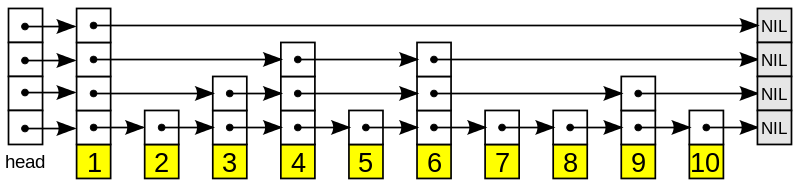

## How do we search in a Skip List?

Example: Search for element 5:

- Start at top level, go to successor if successor is less than or equal to the element
- if successor in level is greater than element, we go one level down

## What is the time and space complexity of the skip list?

- The size is O(n)
- The time to search for an element is O(log(n))

## Perfect vs Randomised Skip Lists

### Perfect Skip Lists:
- The keys are sorted
- Each higher level contains 1/2 the elements of the level below it.
- There are header and sentinel nodes in every level 

### Randomised SKip List
- The bottom level has all the elements
- There is a 1/2 probability that the element is also in the next level.
- When we insert into a randomised skip list, we also decide randomly on which level the element will be.
- What is the time and space complexity of the randomised skip list?

In [ ]:
from random import randint

INF = float('inf')

class SkipList(MapBase):
    class _Node:
        __slots__ = "_item", "_prev", "_next", "_above", "_below"
        def __init__(self, item, prev=None, next=None, above=None, below=None):
            self._item = item
            self._prev = prev
            self._next = next
            self._above = above
            self._below = below

        def __lt__(self, other):
            return self._item < other._item

        def __ge__(self, other):
            return self._item >= other._item

    # ----------------------------public methods------------------------------------
    def __init__(self):
        '''init a SkipList with only an 'empty' level(the height 0)'''
        self._height = 0
        self._size = 0
        self._top = self._Node(self._Item(-INF, None))
        inf_node = self._Node(self._Item(INF, None), prev=self._top)
        self._top._next = inf_node

    def __len__(self):
        return self._size

    def __getitem__(self, key):
        node = self._find_key(key)
        if key == node._item._key:
            return node._item._value
        else:
            raise KeyError(key)

    def __delitem__(self):
        pass
        
    def __setitem__(self, key, value):
        node = self._find_key(key)
        if key == node._item._key:
            node._item._value = value
            walk = node._above
            while walk is not None:
                walk._item._value = value
                walk = walk._above
        else:
            self._add_after(node, key, value, )

    def add(self, key, value):
        '''add a new (k,v) pair to the skiplist, creat a tower'''
        node = self._find_key(key)
        # print("find_key_node:", node._item._key, ", key to insert:", key)
        self._add_after(node, key, value)

    def __iter__(self):
        walk = self._bottom(self._top)
        while walk._next is not None:
            yield walk._item._key
            walk = walk._next

    #----------------------------nonpublic methods------------------------------------
    def _display(self):
        '''a method for debugging, showing the rough structure of the SkipList'''
        walk = self._top
        while walk is not None:
            move = walk
            while move is not None:
                print(move._item._key, end=' -> 'if move._item._key < INF else "")
                move = move._next
            walk = walk._below
            print()

    def _bottom(self, node):
        '''given a node, get the bottom node of this colomn'''
        walk = node
        while walk._below is not None:
            walk = walk._below
        return walk

    def _find_key(self, key):
        level = self._height
        walk = self._top
        while level >= 0:
            while key >= walk._next._item._key:
                walk = walk._next
            if level > 0:
                walk = walk._below  #if already in the bottom, not go below
            level -= 1
        return walk

    def _insert_after_above(self, node1, node2, key, value):
        next = None if node1 is None else node1._next
        new_node = self._Node(self._Item(key, value), prev=node1, next=next, above=None, below=node2)
        if node2 is not None:
            node2._above = new_node
        if node1 is not None and node1._next is not None:
            node1._next._prev = node1._next = new_node
        elif node1 is not None:
            node1._next = new_node
        return new_node

    def _add_after(self, node, key, value):
        h = self._height
        cur_h = 0
        new_node = self._insert_after_above(node, None, key, value)  # insert the bottom node
        self._size += 1
        while randint(0, 8):
            cur_h += 1
            # print("cur_h:", cur_h)
            if cur_h > h:   #create a new line at the top
                right_most = self._top
                while right_most._next is not None:
                    right_most = right_most._next
                self._top = self._insert_after_above(None, self._top, -INF, None)
                self._top._next = self._insert_after_above(self._top, right_most, INF, None)
                self._height += 1
            walk = new_node
            while walk._prev is not None and walk._above is None:
                walk = walk._prev
            # print("height:", self._height)
            walk = walk._above
            new_node = self._insert_after_above(walk, new_node, key, value)



In [ ]:
a = SkipList()
a.add(1, 1)
a.add(5, 5)
a.add(3, 3)
a.add(4, 4)
a.add(2, 2)
a._display()
print("len:", len(a))
print("height:", a._height)
for key in a:
    print(key, a[key])
print("a[1]:", a[1])
print("a[3]:", a[3])
a[4] = "abcde"
for key in a:
     print(key, a[key])

-inf -> 3 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 3 -> 4 -> 5 -> inf
-inf -> 1 -> 2 -> 3 -> 4 -> 5 -> inf
-inf -> 1 -> 2 -> 3 -> 4 -> 5 -> inf
-inf -> 1 -> 2 -> 3 -> 4 -> 5 -> inf
-inf -> 1 -> 2 -> 3 -> 4 -> 5 -> inf
len: 5
height: 11
-inf None
1 1
2 2
3 3
4 4
5 5
a[1]: 1
a[3]: 3
-inf None
1 1
2 2
3 3
4 abcde
5 5
